## Test results from filtering methods

In [20]:
import numpy as np
import scipy
import  matplotlib.pyplot as plt
from keras import losses

In [21]:
# Load the full test data to be checked
# path for reading the test data
test_path = '../data/processed/cseg_fault_dyke_fold_model_50_3/'

In [22]:
# Read test data and rearrange it
X_test = np.load(test_path + 'X_test.npy')
Y_test = np.load(test_path + 'Y_test.npy')
X_test1 = np.expand_dims(X_test, axis = 3)
Y_test1 = np.expand_dims(Y_test, axis = 3)

In [23]:
# Load the autoencoder model
##  Load the saved model
from keras.models import model_from_json
model_path = 'trained_models/model_3_50_50_1_5/'
json_file = open(model_path + 'model_1.json')
loaded_model_json = json_file.read()
json_file.close()
autoencoder = model_from_json(loaded_model_json)
autoencoder.load_weights(model_path + 'model_1.h5')
print(autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 8)         584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
__________

In [24]:
# Denoising using the trained autoencoder
Y_pred = autoencoder.predict(X_test1)


In [25]:
def mae(Y_pred, Y_target):
    mae_error = (np.sum(np.abs(Y_pred - Y_target)))/ (Y_pred.shape[0] * Y_pred.shape[1])
    return mae_error

In [26]:
def rmse(Y_pred, Y_target):
    rmse_error = np.sqrt(np.sum(np.square(Y_pred - Y_target))/ (Y_pred.shape[0] * Y_pred.shape[1]))
    return rmse_error

In [27]:
# Choosing the sample image from test data for testing
sample_index = 82
X_input = X_test1[sample_index, : ,: , 0]
Y_input = Y_test1[sample_index, :,: , 0]
Y_ca = Y_pred[sample_index, :, :, 0]
print(rmse(X_input, Y_input))

0.08808151000241601


In [28]:
# Denoising using total variational filtering
from skimage.restoration import denoise_tv_chambolle
X_tv = denoise_tv_chambolle(X_input, weight = 0.1)
print(rmse(X_tv, Y_input))

0.06145493229510211


In [29]:
# Denoising using bilateral filtering
from skimage.restoration import denoise_bilateral
X_bf = denoise_bilateral(X_input, multichannel = False)
print(rmse(X_bf, Y_input))

0.07308736588831062


In [30]:
# Denoise based on wavelet filtering
from skimage.restoration import denoise_wavelet
X_wf = denoise_wavelet(X_input)
print(rmse(X_wf, Y_input))

0.0628201141580348


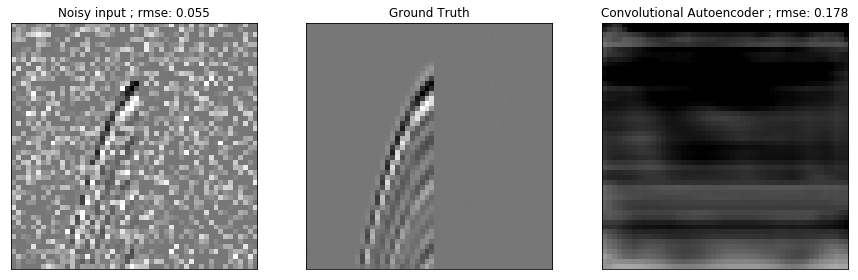

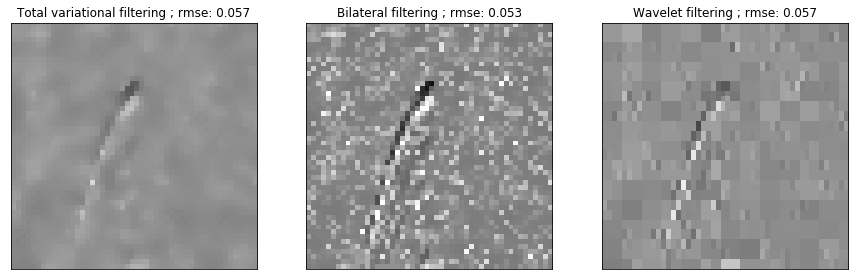

In [31]:


# Randomly visualizing a certain sample from test data
min_val = np.min(X_input)
max_val = np.max(Y_input)

fig, axs = plt.subplots(ncols = 3, figsize = (15, 15))
plt.set_cmap('gray')
axs[0].imshow(X_input, vmin = min_val, vmax = max_val)
axs[0].set_title('Noisy input ; rmse: ' + str(round(mae(X_input, Y_input), 3)))
axs[1].imshow(Y_input, vmin = min_val, vmax = max_val)
axs[1].set_title('Ground Truth')
axs[2].imshow(Y_ca, vmin = min_val, vmax = max_val)
axs[2].set_title('Convolutional Autoencoder ; rmse: ' + str(round(mae(Y_ca, Y_input), 3)))
fig2, axs2 = plt.subplots(ncols = 3, figsize = (15, 15))
plt.set_cmap('gray')
axs2[0].imshow(X_tv, vmin = min_val, vmax = max_val)
axs2[0].set_title('Total variational filtering ; rmse: ' + str(round(mae(X_tv, Y_input), 3)))
axs2[1].imshow(X_bf, vmin = min_val, vmax = max_val)
axs2[1].set_title('Bilateral filtering ; rmse: ' + str(round(mae(X_bf, Y_input), 3)))
axs2[2].imshow(X_wf, vmin = min_val, vmax = max_val)
axs2[2].set_title('Wavelet filtering ; rmse: ' + str(round(mae(X_wf, Y_input), 3)))
# Removing the ticks
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
# Removing the ticks
for ax in axs2:
    ax.set_xticks([])
    ax.set_yticks([])

In [43]:
# Printing the error values
print('Initial error : ', mse(X_input, Y_input))
print('Total variational filtering : ', mse(X_tv, Y_input))
print('Convolutional Autoencoder : ', mse(Y_ca, Y_input))

NameError: name 'mse' is not defined

In [ ]:
# Determine mean of rmse for convolutional autoencoder on test data
